In [1]:
from pathlib import Path

from matplotlib import pyplot as plt
import numpy as np

from contact_graspnet.dataloading import OrigExampleData, YCBSimulationData
from contact_graspnet.utils.misc import get_root_dir
from contact_graspnet.preprocessing import YCBSimulationDataPreprocessor, OrigExampleDataPreprocessor, ZClipper, OrigDepth2Points

2023-02-20 08:46:06.263495: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-20 08:46:09.002588: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/moritz/catkin_ws/devel/lib:/opt/ros/noetic/lib:/home/moritz/.mujoco/mujoco210/bin:/home/moritz/mambaforge/envs/contact/lib/:/home/moritz/mambaforge/envs/contact/lib/
2023-02-20 08:46:09.002952: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No

In [2]:
orig_example_dataset = OrigExampleData(get_root_dir() / "data" / "raw" / "orig_test_data")
ycb_sim_1_dataset = YCBSimulationData(Path.home() / "Documents" / "ycb_sim_data_1")

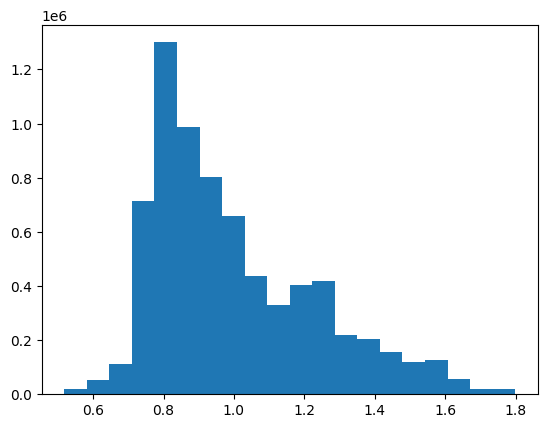

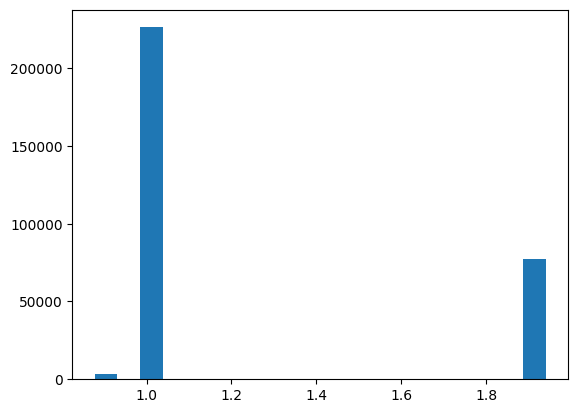

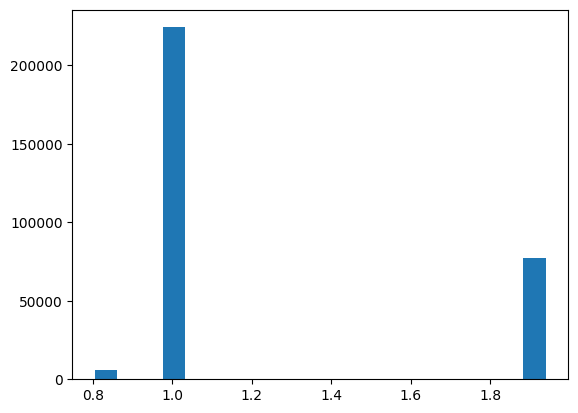

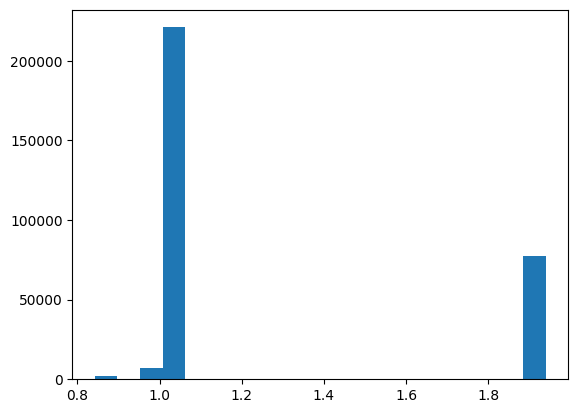

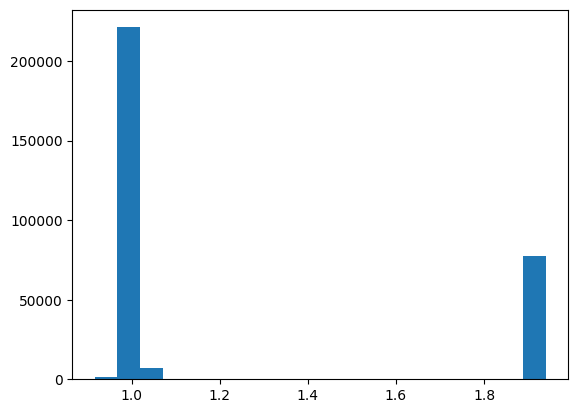

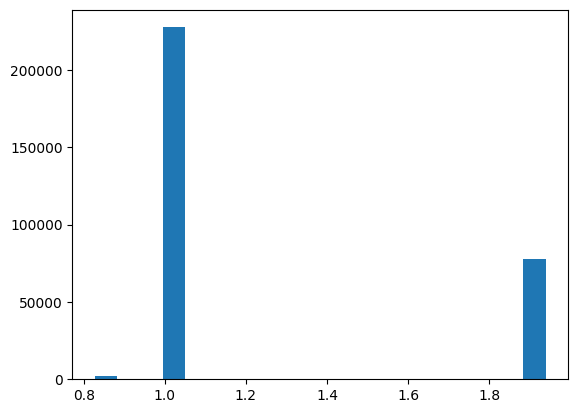

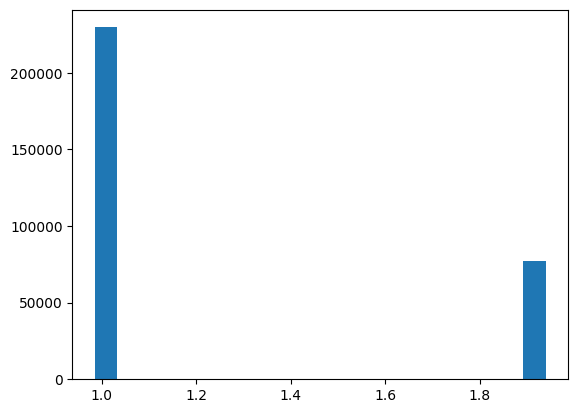

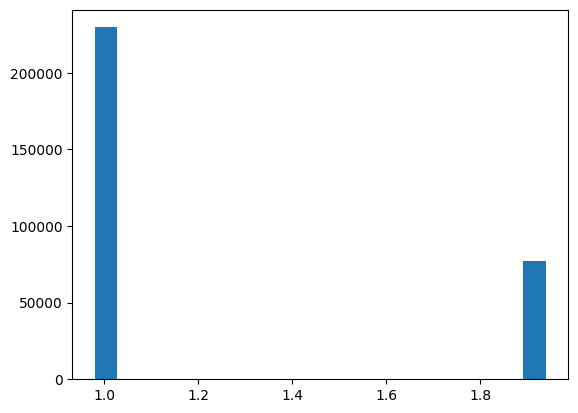

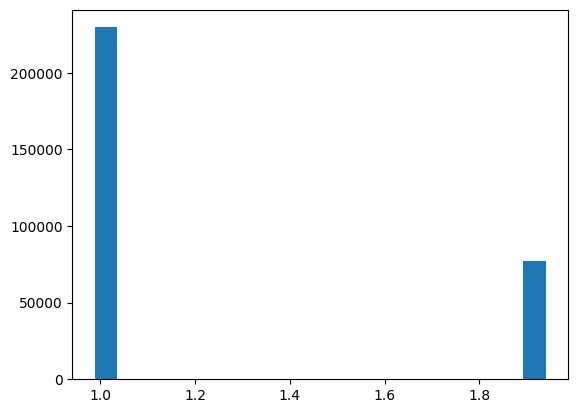

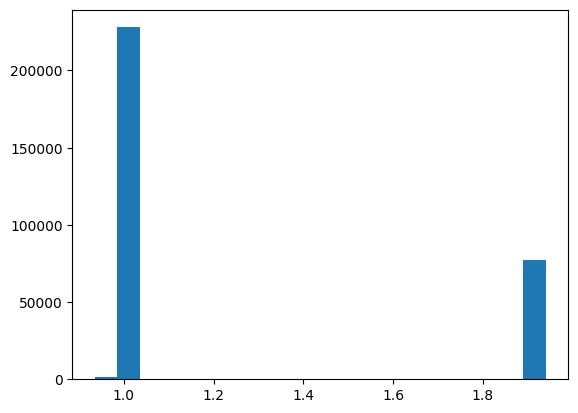

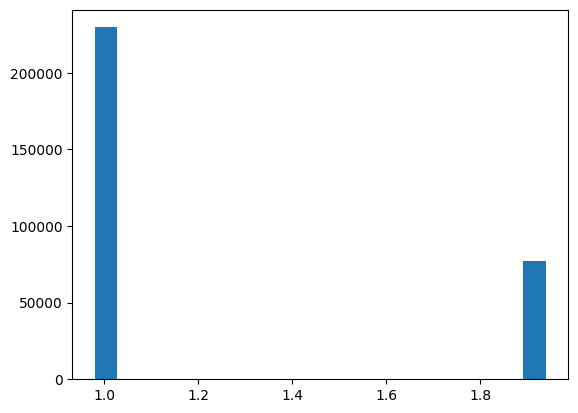

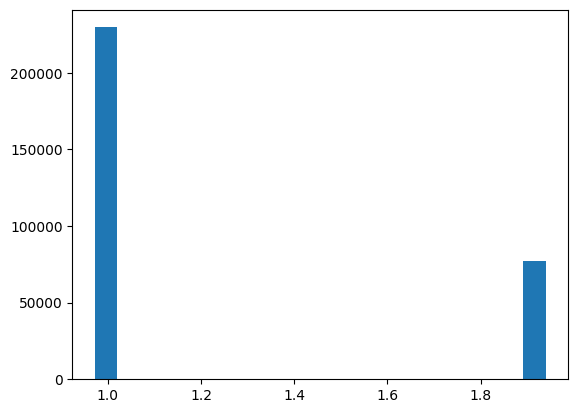

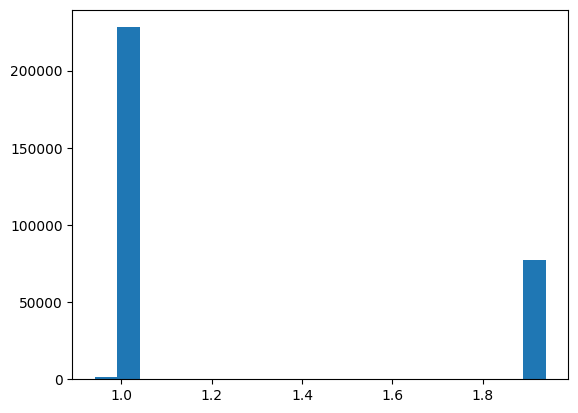

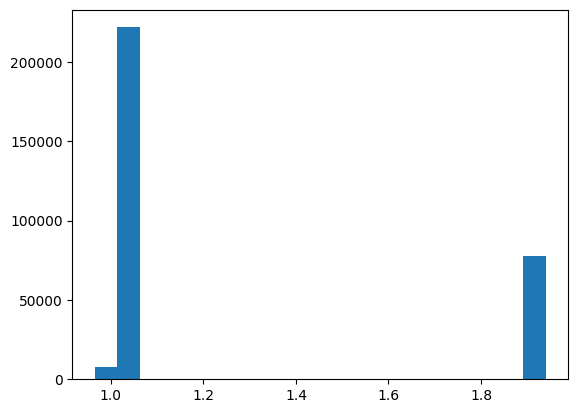

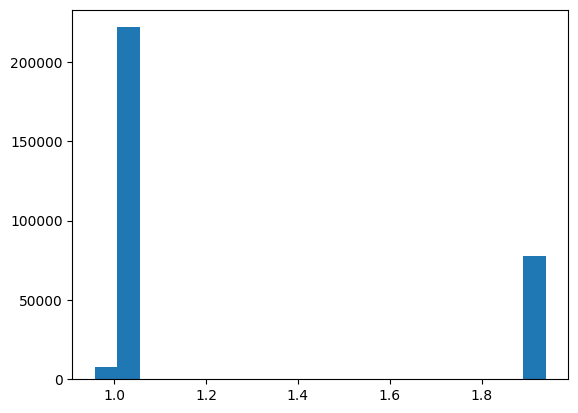

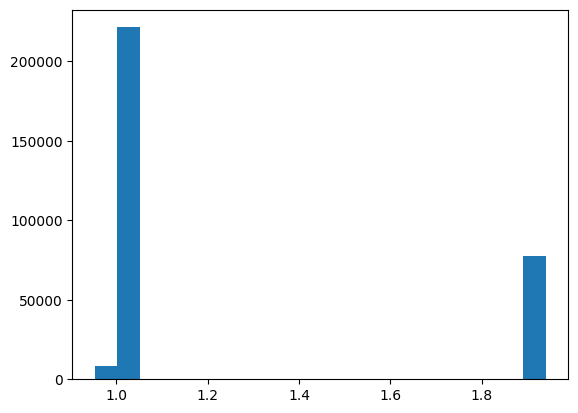

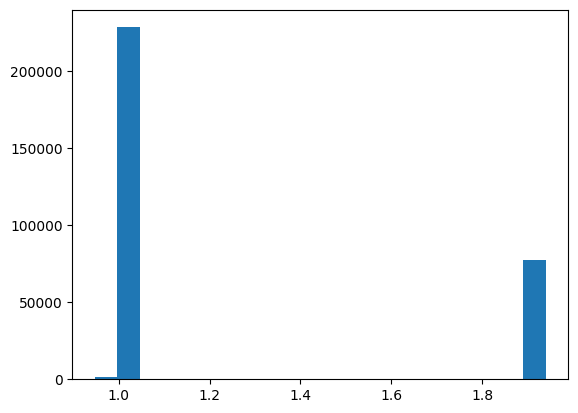

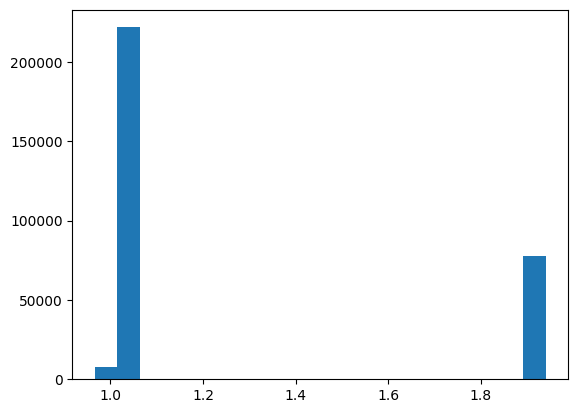

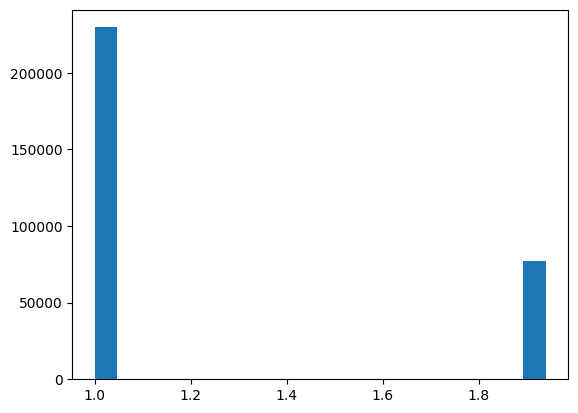

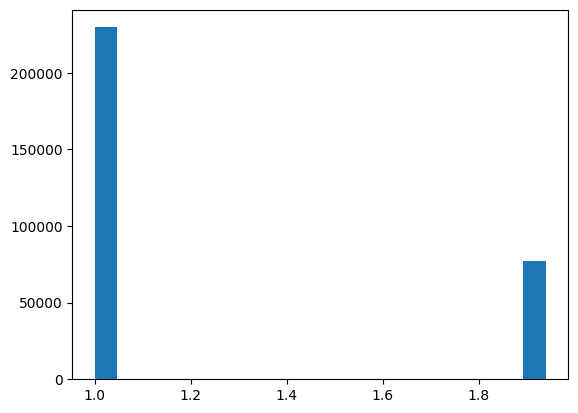

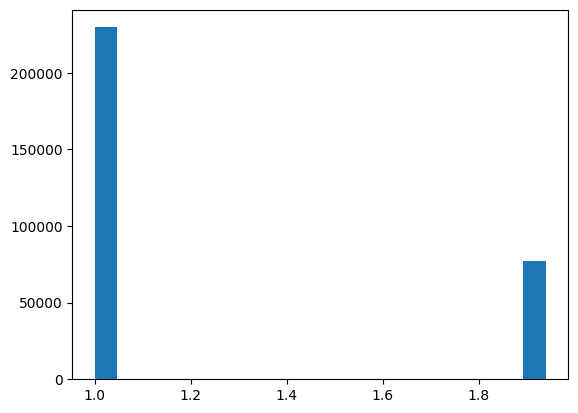

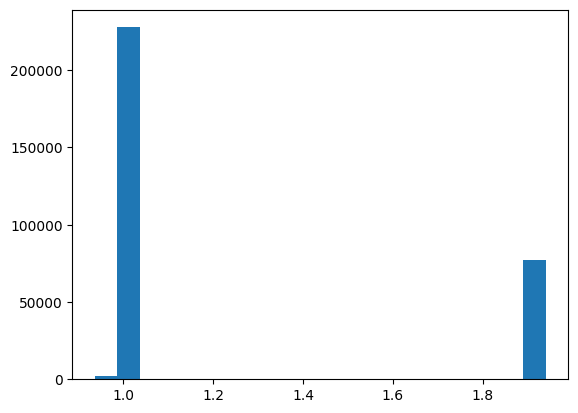

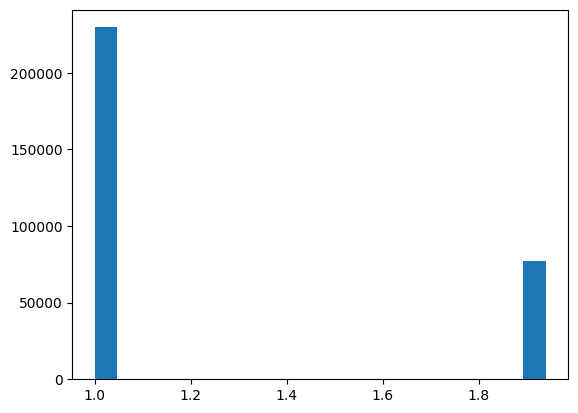

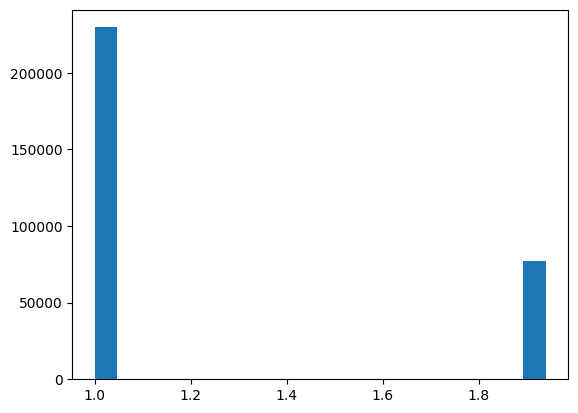

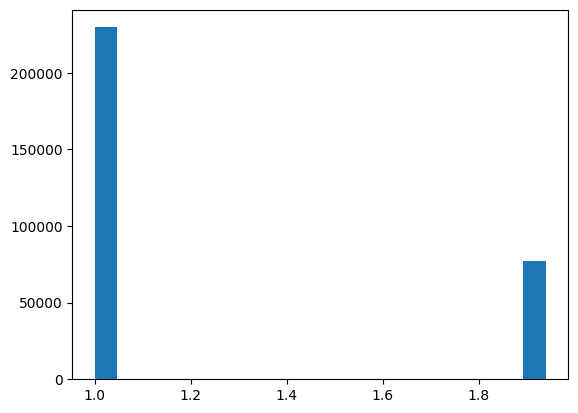

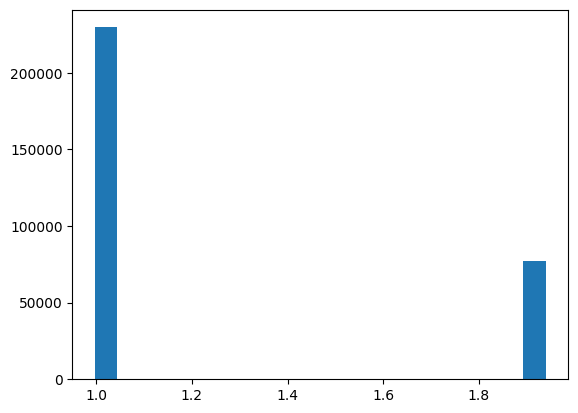

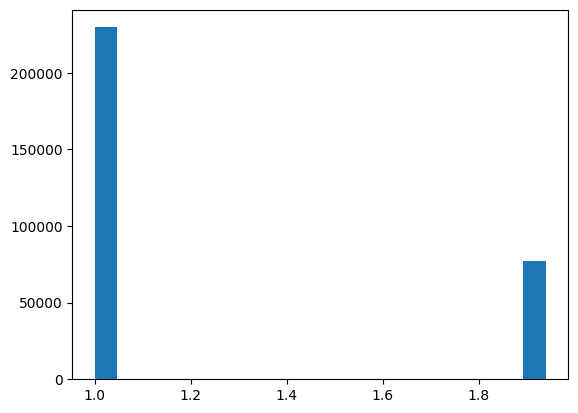

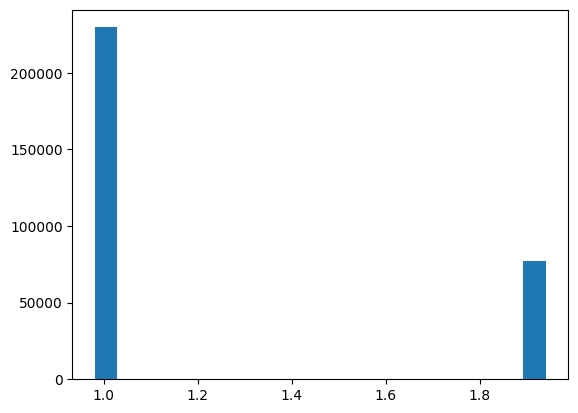

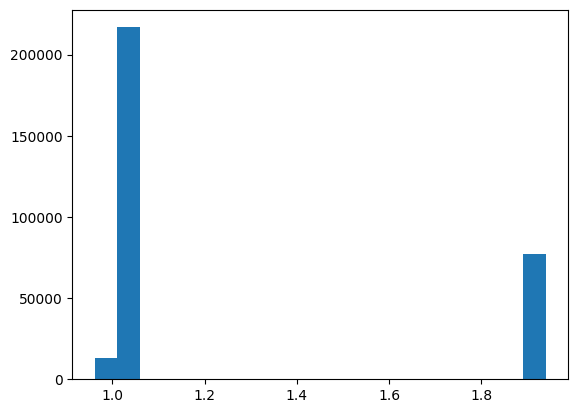

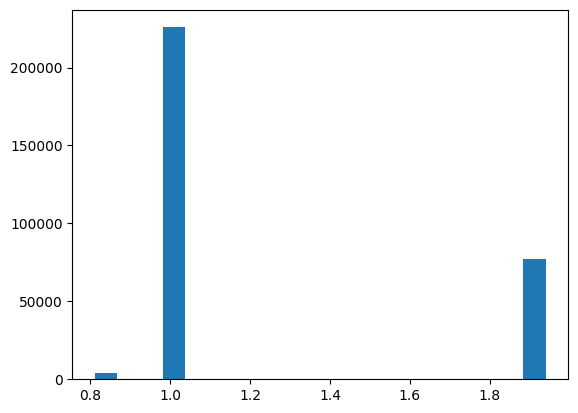

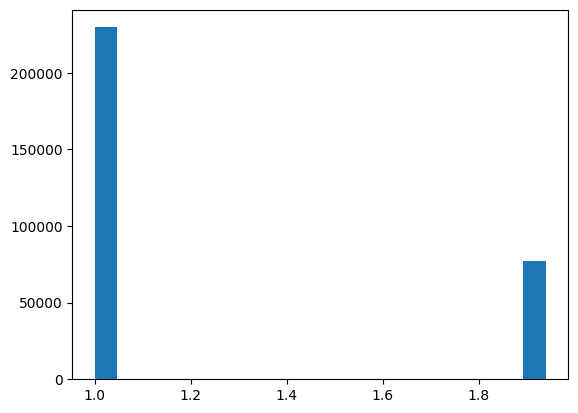

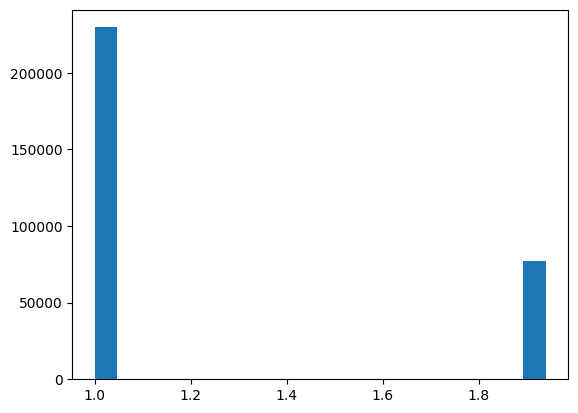

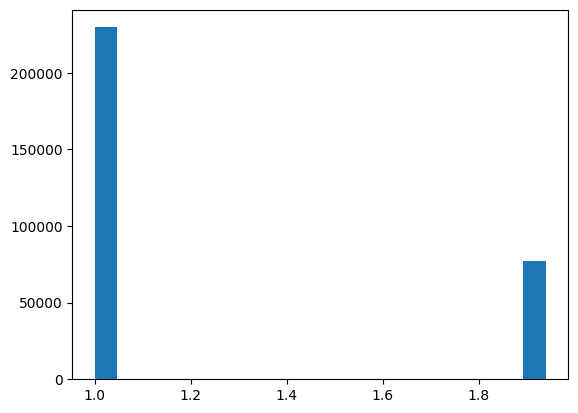

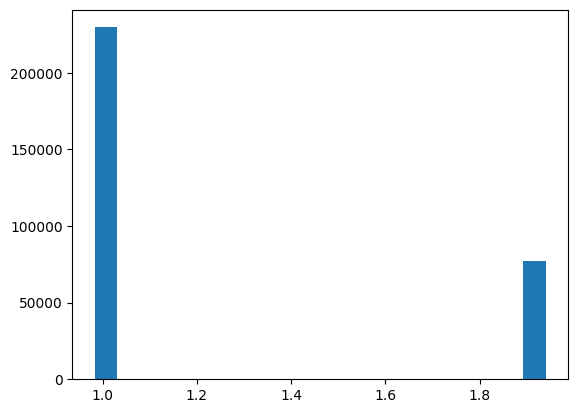

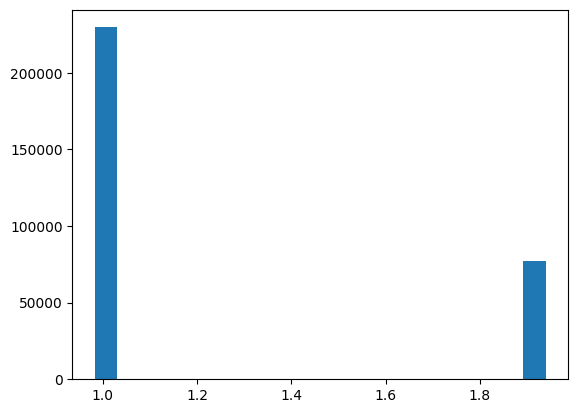

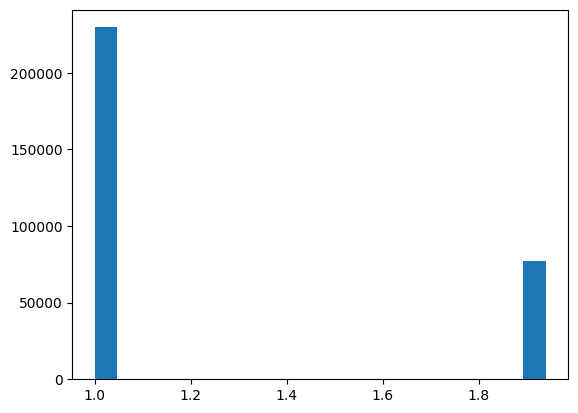

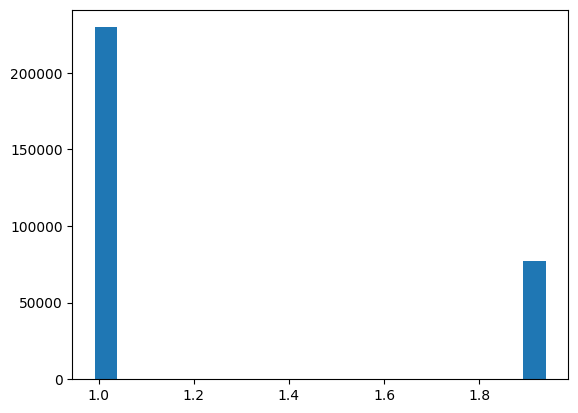

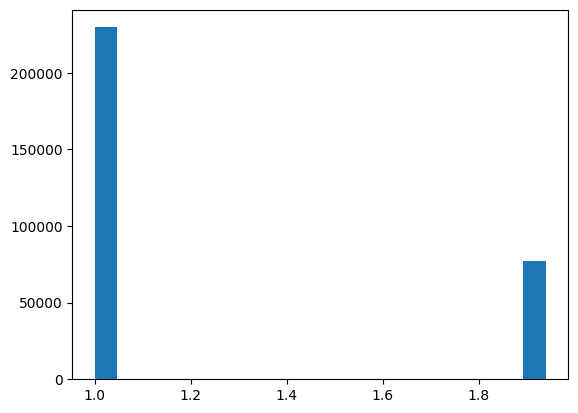

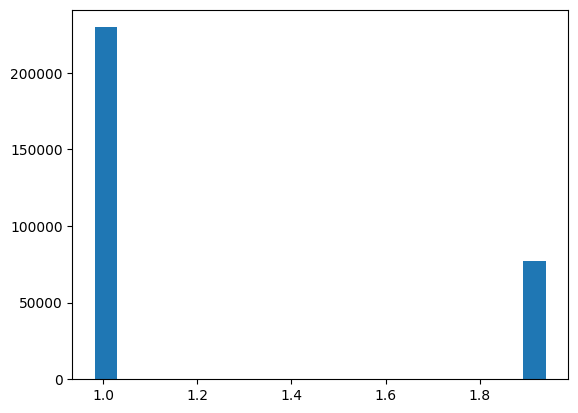

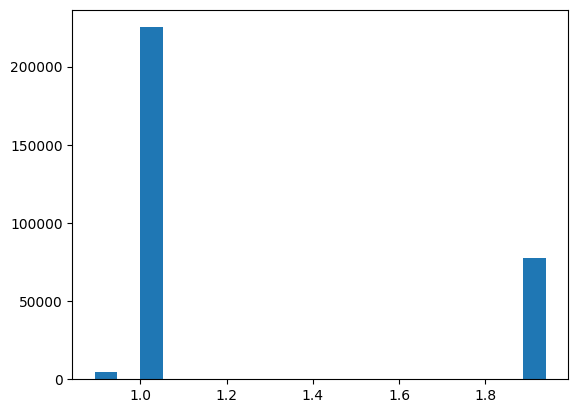

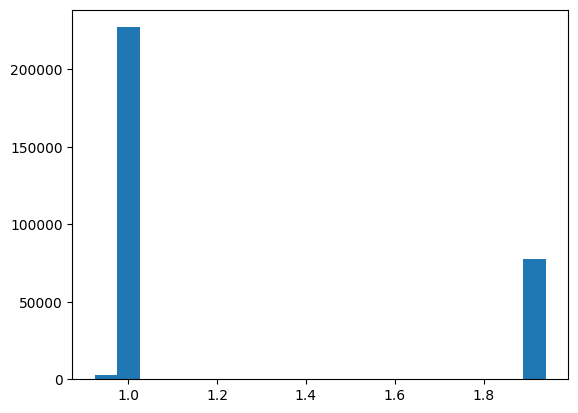

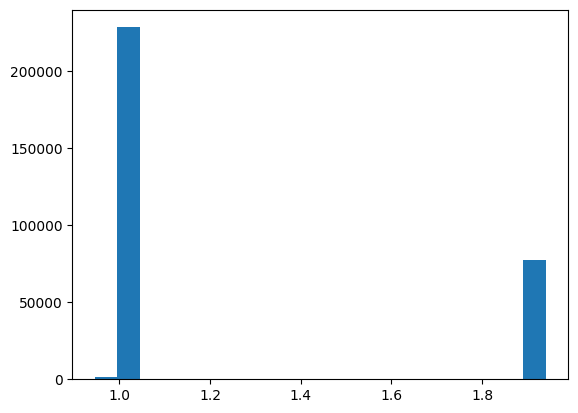

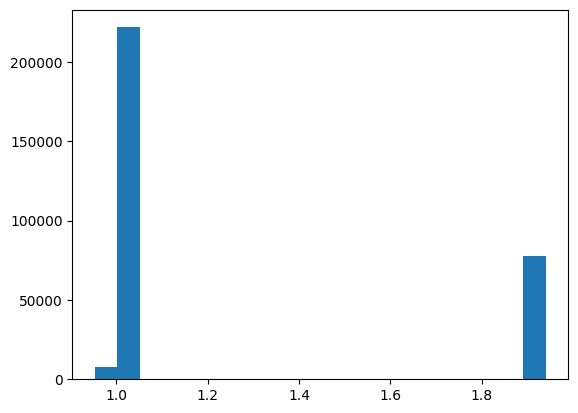

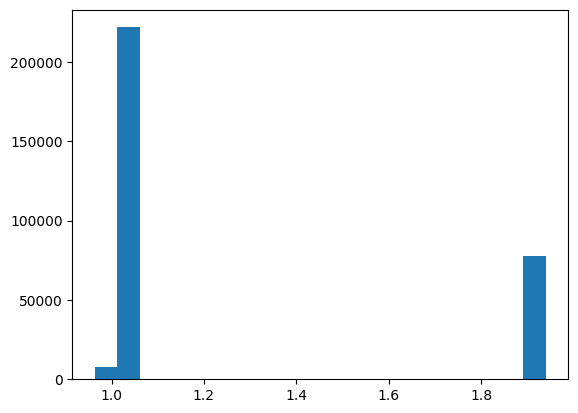

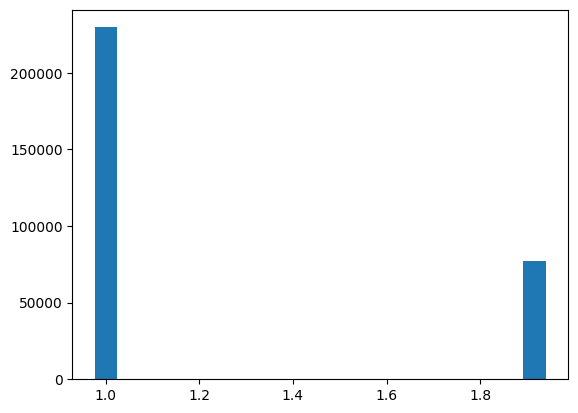

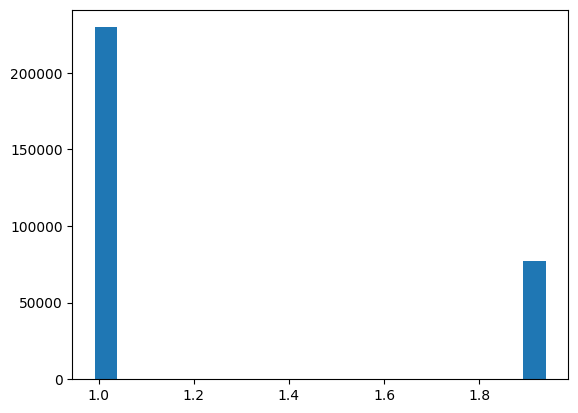

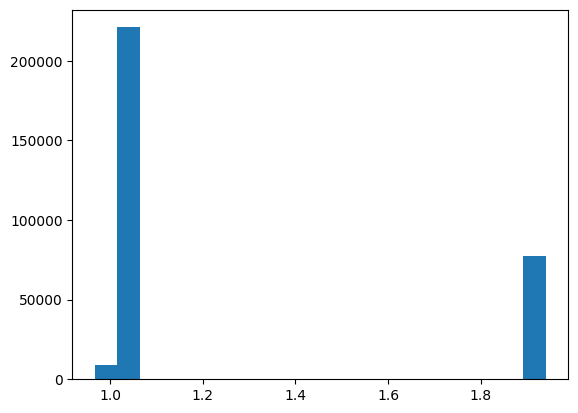

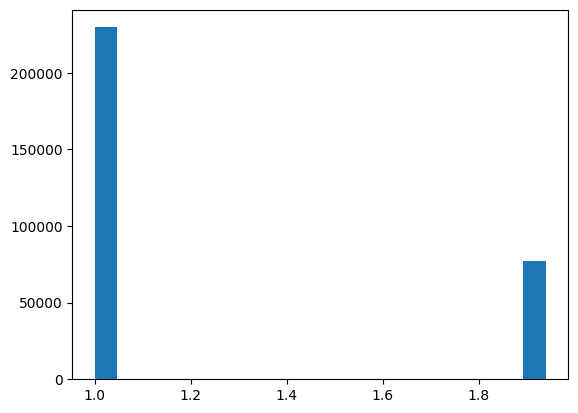

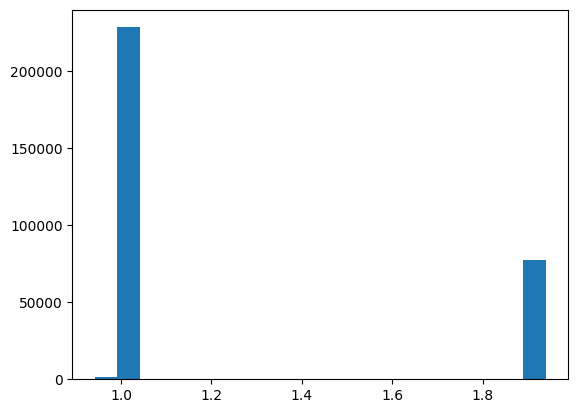

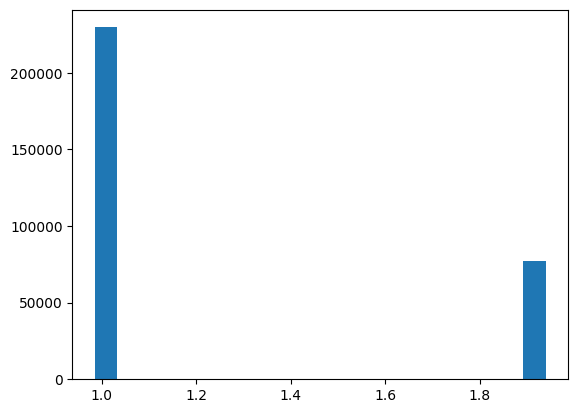

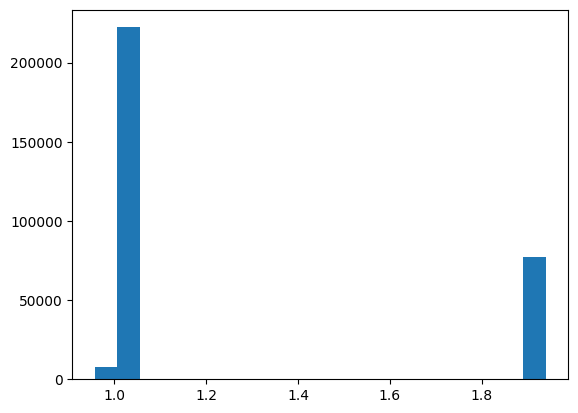

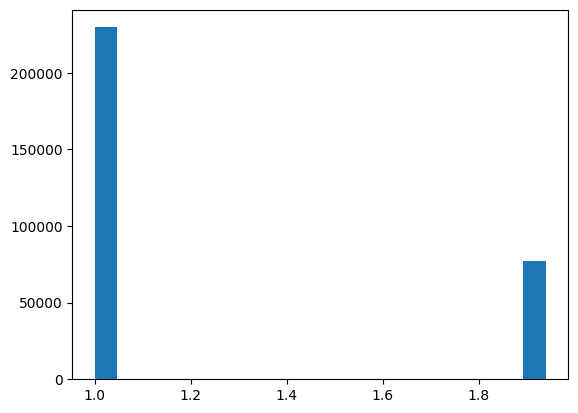

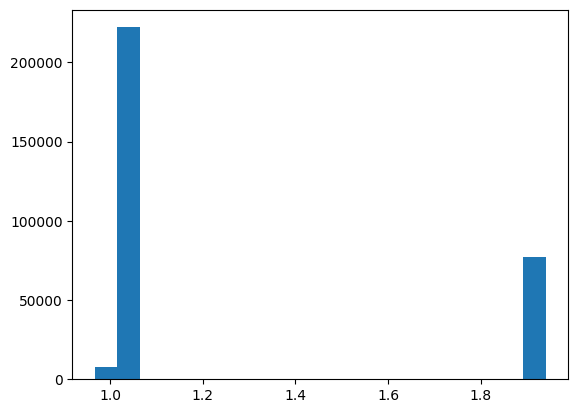

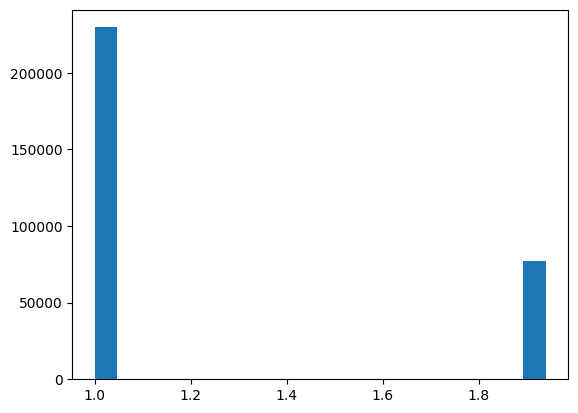

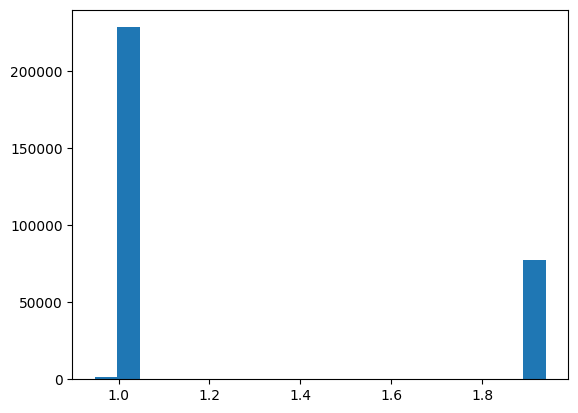

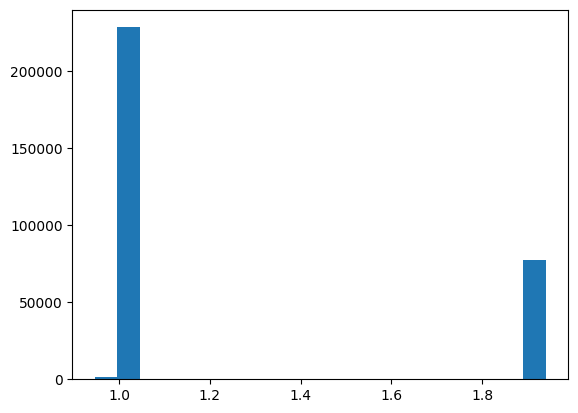

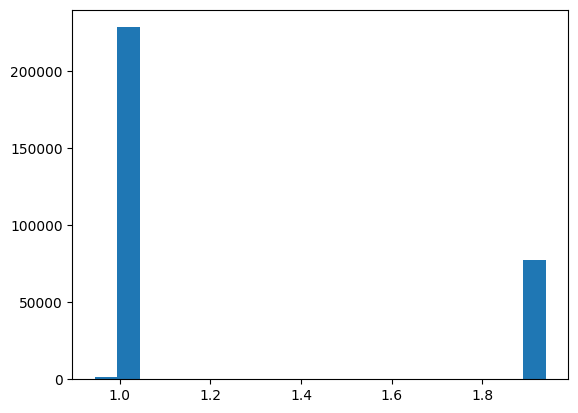

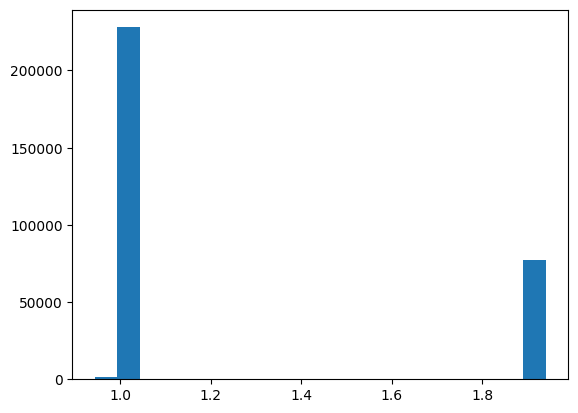

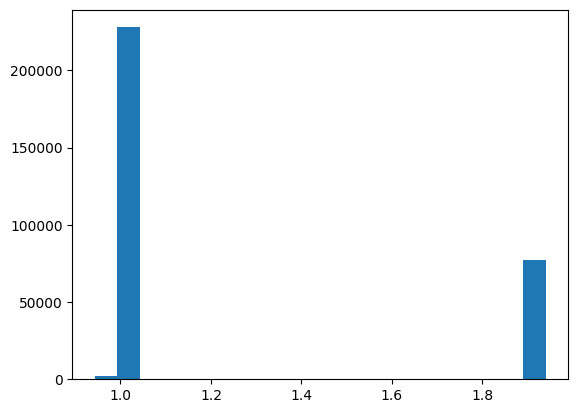

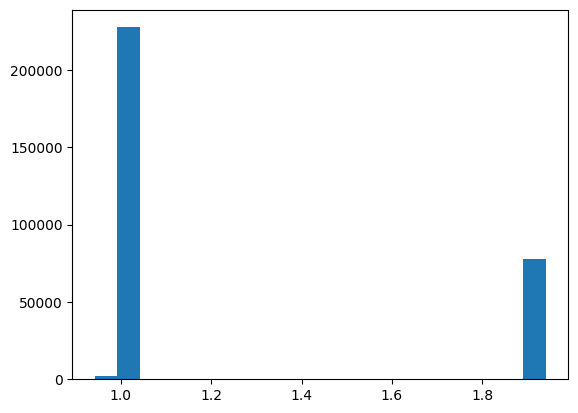

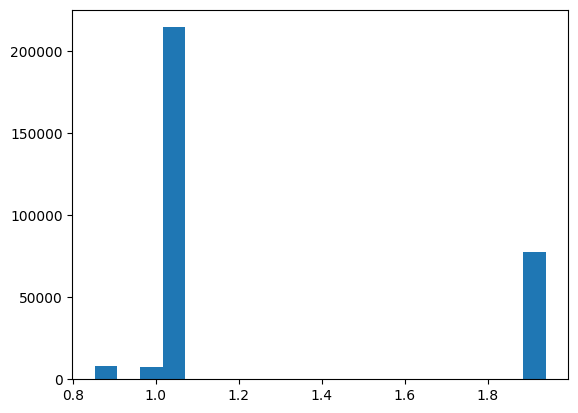

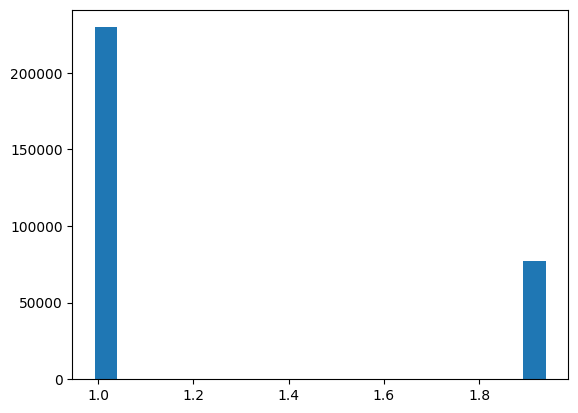

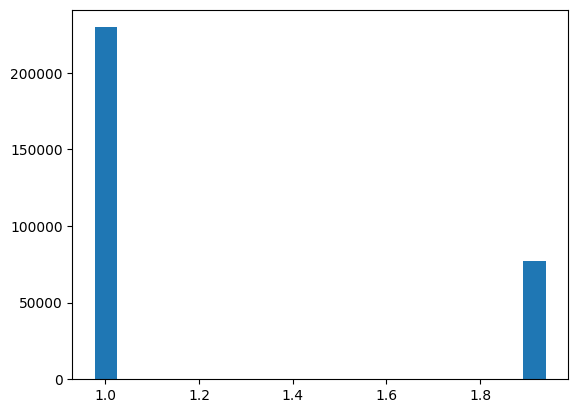

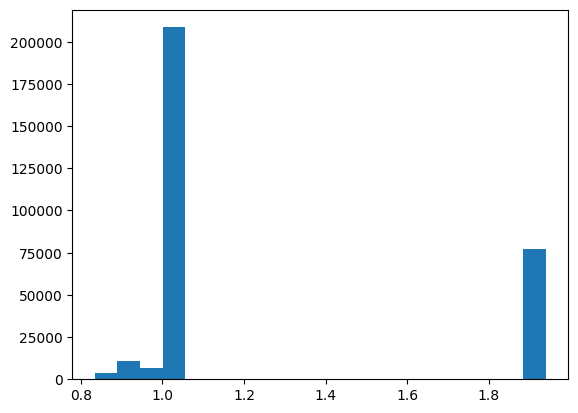

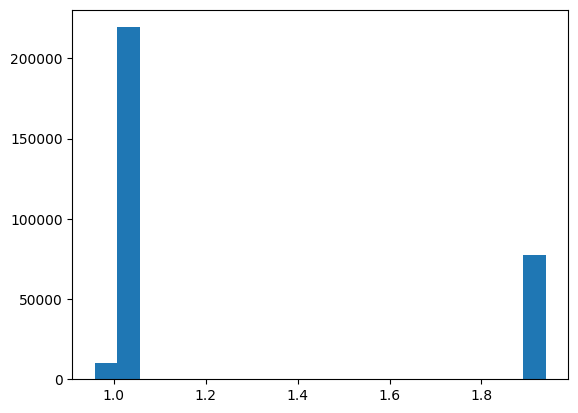

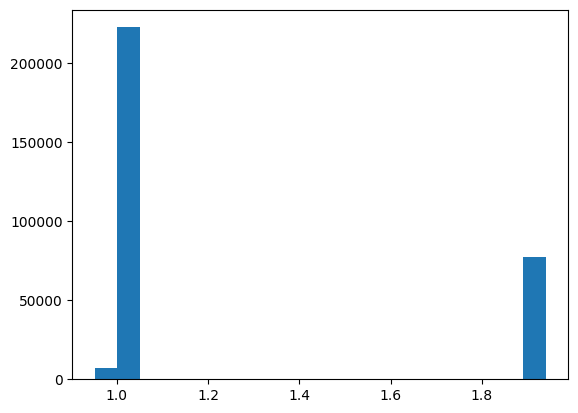

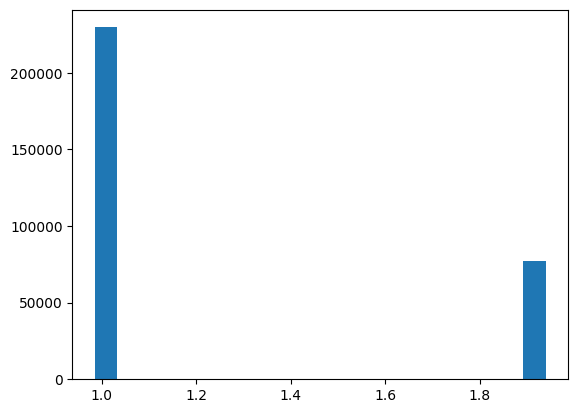

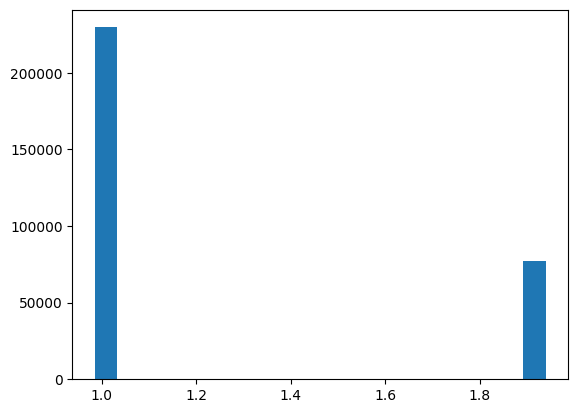

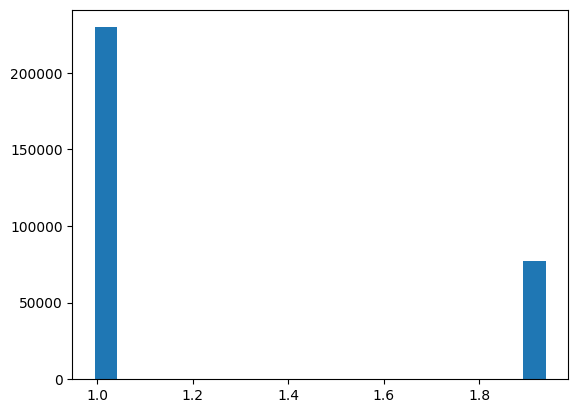

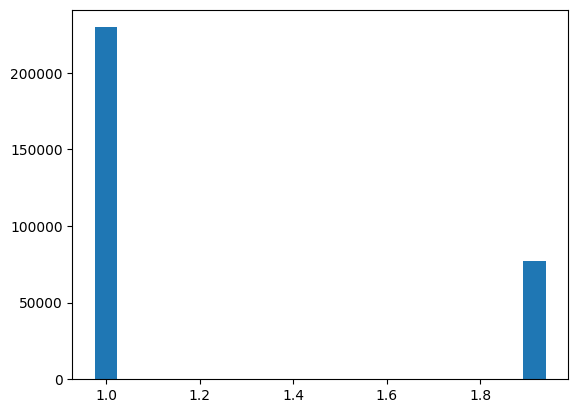

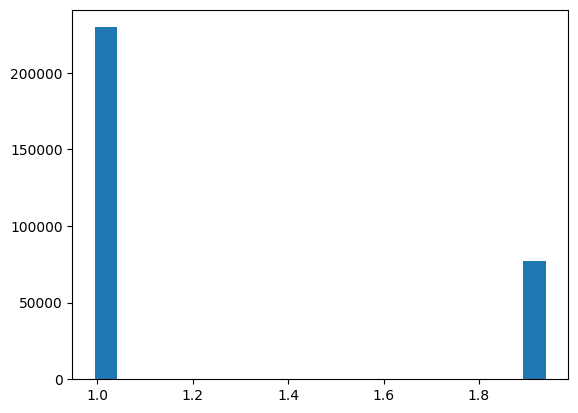

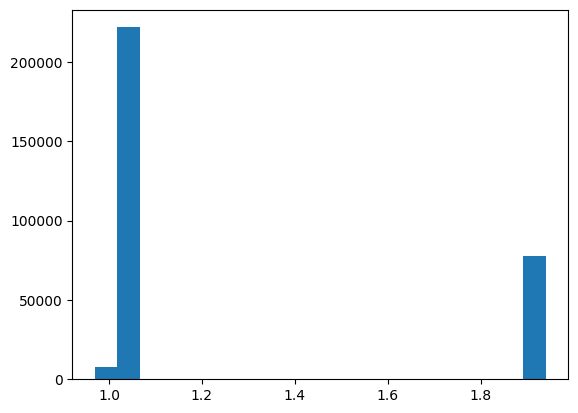

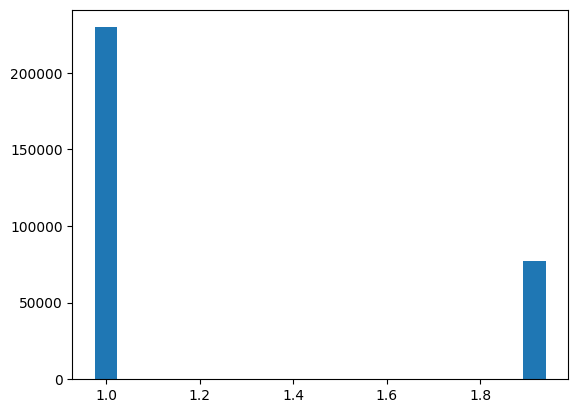

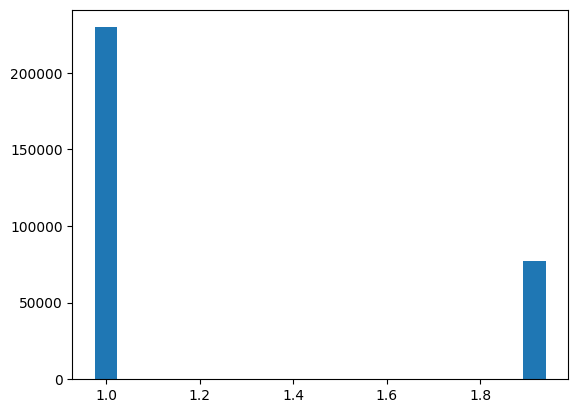

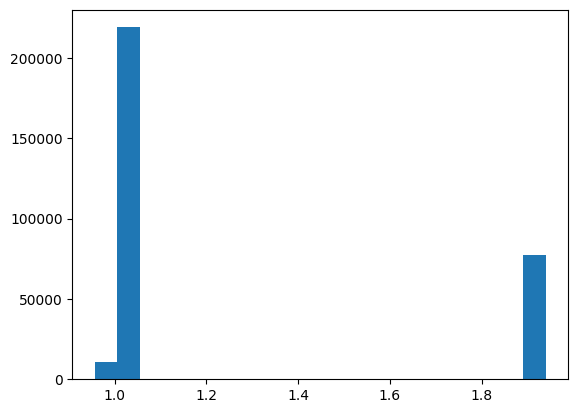

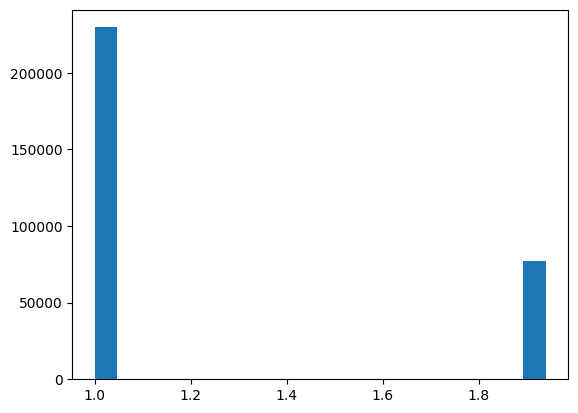

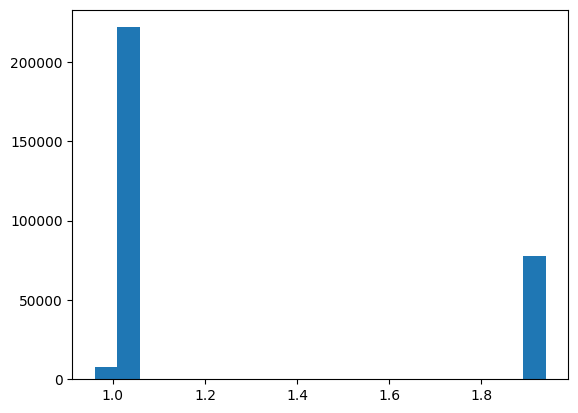

In [4]:
orig_example_preprocessor = OrigExampleDataPreprocessor(
    OrigDepth2Points(),
    ZClipper((0.2, 1.8)),
)

all_zs = np.array([])
for i in range(len(orig_example_dataset)):
    sample = orig_example_dataset[i]
    pointcloud = orig_example_preprocessor(sample)
    zs = pointcloud[:, 2]
    all_zs = np.concatenate((all_zs, zs))

plt.hist(all_zs, bins=20)

plt.show()

ycb_preprocessor = YCBSimulationDataPreprocessor(
    # z_clipper = ZClipper((0.2, 1.8)),
    z_clipper = None,
)

all_zs = np.array([])
for i in range(len(ycb_sim_1_dataset)):
    sample = ycb_sim_1_dataset[i]
    pointcloud = ycb_preprocessor(sample)
    zs = pointcloud[:, 2]
    all_zs = np.concatenate((all_zs, zs))

    
    plt.hist(zs, bins=20)

    plt.show()


# plt.hist(all_zs, bins=20)

# plt.show()

